This notebooks is designed for:
* basic statistical analysis
* exploratory analysis of metadata
* compare daily to hourly data
* build static and interactive visualizations from a whole year timestamp for weather features.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import datetime
import pytz
import csv
import re

from pathlib import Path 
from datetime import datetime as dt
from datetime import timedelta as td

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from IPython.display import display, Markdown

current_path = Path().resolve()
abs_path = str(current_path.parent)
sys.path.append(abs_path)

sns.set()

In [2]:
RAW_PATH = current_path.parent / 'data' / 'raw'
OUTPUT_PATH = current_path.parent / 'data' / 'output'

# links
* https://darksky.net/dev/docs
* https://github.com/bitpixdigital/forecastiopy3
* https://stackoverflow.com/questions/55866558/should-darksky-time-machine-historical-data-show-precipaccumulation-when-preci

In [3]:
time= "1561950000" # = 2019-7-1-0-0-0
units = "si"
lang = "en"
daily = 60*60*24 # = number of seconds in a day
days_in_month = 31
days_in_month = days_in_month-1

# csv to pandas

In [4]:
df_montevideo = pd.read_csv(RAW_PATH/'Montevideo'/'montevideo-daily_weather.csv')
df_miraflores = pd.read_csv(RAW_PATH/'Miraflores'/'miraflores-daily_weather.csv')
df_rio = pd.read_csv(RAW_PATH/'Rio de Janeiro'/'rio_de_janeiro-daily_weather.csv')

In [5]:
df_montevideo_hour = pd.read_csv(RAW_PATH/'Montevideo'/'montevideo-weather.csv')

In [6]:
df_rio_hour = pd.read_csv(RAW_PATH/'Rio de Janeiro'/'rio_de_janeiro-weather.csv')

In [7]:
dfs_dict = {"montevideo": df_montevideo, "miraflores": df_miraflores, "rio de janeiro": df_rio}

In [8]:
df_miraflores.head()

,time,cloudCover,humidity,precipIntensity,windSpeed
0,2018-09-30 02:00:00,0.68,0.71,0.0023,3.16
1,2018-10-01 02:00:00,0.88,0.72,0.0022,2.83
2,2018-10-02 02:00:00,0.82,0.73,0.0032,2.60
3,2018-10-03 02:00:00,1.00,0.72,0.0025,2.10
4,2018-10-04 02:00:00,0.92,0.72,0.0009,2.31


In [9]:
df_miraflores.tail()

,time,cloudCover,humidity,precipIntensity,windSpeed
325,2019-08-21 02:00:00,0.35,0.71,0.0054,3.03
326,2019-08-22 02:00:00,0.36,0.70,0.0032,2.58
327,2019-08-23 02:00:00,0.35,0.71,0.0065,2.65
328,2019-08-24 02:00:00,0.60,0.72,0.0119,2.74
329,2019-08-25 02:00:00,0.61,0.72,0.0084,2.55


In [10]:
df_montevideo.head()

,time,cloudCover,humidity,precipIntensity,windSpeed
0,2018-10-01 00:00:00,0.52,0.65,0.2475,6.79
1,2018-10-02 00:00:00,0.15,0.49,0.0011,2.29
2,2018-10-03 00:00:00,0.17,0.58,0.0011,3.62
3,2018-10-04 00:00:00,0.09,0.58,0.0008,3.89
4,2018-10-05 00:00:00,0.41,0.63,0.0012,3.81


In [11]:
df_montevideo.tail()

,time,cloudCover,humidity,precipIntensity,windSpeed
325,2019-08-22 00:00:00,0.65,0.87,0.0022,2.11
326,2019-08-23 00:00:00,0.45,0.79,0.0059,1.18
327,2019-08-24 00:00:00,0.94,0.65,0.0029,3.57
328,2019-08-25 00:00:00,0.87,0.71,0.0008,4.30
329,2019-08-26 00:00:00,0.80,0.82,0.0252,3.86


In [12]:
df_rio.head()

,time,cloudCover,humidity,precipIntensity,windSpeed
0,2018-10-01 00:00:00,0.916667,0.830000,0.148567,2.076667
1,2018-10-02 00:00:00,0.320000,0.730000,0.000900,3.066667
2,2018-10-03 00:00:00,0.460000,0.766667,0.007500,3.510000
3,2018-10-04 00:00:00,0.883333,0.793333,0.133733,3.733333
4,2018-10-05 00:00:00,0.943333,0.796667,0.607367,5.033333


In [13]:
df_rio.tail()

,time,cloudCover,humidity,precipIntensity,windSpeed
325,2019-08-22 00:00:00,0.866667,0.816667,0.058833,2.563333
326,2019-08-23 00:00:00,0.863333,0.830000,0.188733,2.566667
327,2019-08-24 00:00:00,0.686667,0.843333,0.143267,2.646667
328,2019-08-25 00:00:00,0.796667,0.810000,0.123567,2.590000
329,2019-08-26 00:00:00,0.663333,0.716667,0.013300,3.983333


In [14]:
print("INFO:\n")
for name,df in dfs_dict.items():
    print(name.upper(), '\n')
    print(df.info(), '\n')

INFO:

MONTEVIDEO 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 5 columns):
time               330 non-null object
cloudCover         330 non-null float64
humidity           330 non-null float64
precipIntensity    330 non-null float64
windSpeed          330 non-null float64
dtypes: float64(4), object(1)
memory usage: 13.0+ KB
None 

MIRAFLORES 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 5 columns):
time               330 non-null object
cloudCover         330 non-null float64
humidity           330 non-null float64
precipIntensity    330 non-null float64
windSpeed          330 non-null float64
dtypes: float64(4), object(1)
memory usage: 13.0+ KB
None 

RIO DE JANEIRO 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 5 columns):
time               330 non-null object
cloudCover         330 non-null float64
humidity           330 non-null float64
p

In [15]:
print("DESCRIPTION:\n")
for name,df in dfs_dict.items():
    print(name.upper(), '\n')
    print(df.describe(), '\n')

DESCRIPTION:

MONTEVIDEO 

       cloudCover    humidity  precipIntensity   windSpeed
count  330.000000  330.000000       330.000000  330.000000
mean     0.544758    0.711273         0.131910    4.545061
std      0.284164    0.096904         0.320029    1.731332
min      0.000000    0.460000         0.000000    0.760000
25%      0.322500    0.650000         0.001200    3.312500
50%      0.575000    0.710000         0.006400    4.385000
75%      0.790000    0.780000         0.078000    5.665000
max      1.000000    0.950000         2.047500   10.160000 

MIRAFLORES 

       cloudCover    humidity  precipIntensity   windSpeed
count  330.000000  330.000000       330.000000  330.000000
mean     0.715061    0.719909         0.004282    2.784333
std      0.231883    0.014700         0.004532    0.465390
min      0.030000    0.660000         0.000000    1.620000
25%      0.552500    0.710000         0.001700    2.462500
50%      0.750000    0.720000         0.003000    2.800000
75%      0.920

In [16]:
df.columns

Index(['time', 'cloudCover', 'humidity', 'precipIntensity', 'windSpeed'], dtype='object')

In [17]:
print("VARIABLE CATEGORIES:")
for name,df in dfs_dict.items():
    print('\n', name.upper(), sep='')
    for cat in df.columns:
        print("Number of levels in category '{0}': \b {1:2.2f} ".format(cat, df_miraflores[cat].unique().size))

VARIABLE CATEGORIES:

MONTEVIDEO
Number of levels in category 'time':  330.00 
Number of levels in category 'cloudCover':  80.00 
Number of levels in category 'humidity':  11.00 
Number of levels in category 'precipIntensity':  107.00 
Number of levels in category 'windSpeed':  152.00 

MIRAFLORES
Number of levels in category 'time':  330.00 
Number of levels in category 'cloudCover':  80.00 
Number of levels in category 'humidity':  11.00 
Number of levels in category 'precipIntensity':  107.00 
Number of levels in category 'windSpeed':  152.00 

RIO DE JANEIRO
Number of levels in category 'time':  330.00 
Number of levels in category 'cloudCover':  80.00 
Number of levels in category 'humidity':  11.00 
Number of levels in category 'precipIntensity':  107.00 
Number of levels in category 'windSpeed':  152.00 


# Simple statistics
Wind Speed and Precipitation Intensity

Let us first investigate wind speed and precipitation intensity. We believe that both factors might influence the traffic in a city, principally if they are correlated. Is this a reality in the case of Rio de Janeiro? Let's see some statistics.

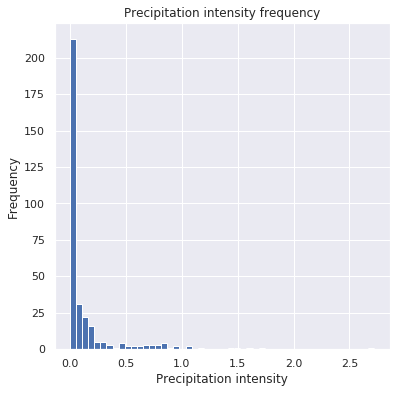

In [18]:
df_rio.precipIntensity.plot(kind = 'hist',bins = 50,figsize = (6,6))
plt.title('Precipitation intensity frequency')
plt.xlabel('Precipitation intensity')
plt.show()

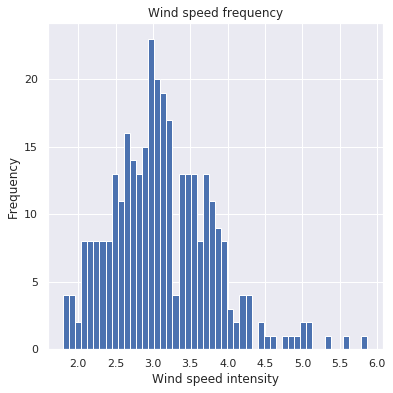

In [19]:
df_rio.windSpeed.plot(kind = 'hist',bins = 50,figsize = (6,6))
plt.title('Wind speed frequency')
plt.xlabel('Wind speed intensity')
plt.show()

/home/master/anaconda3/envs/altair/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


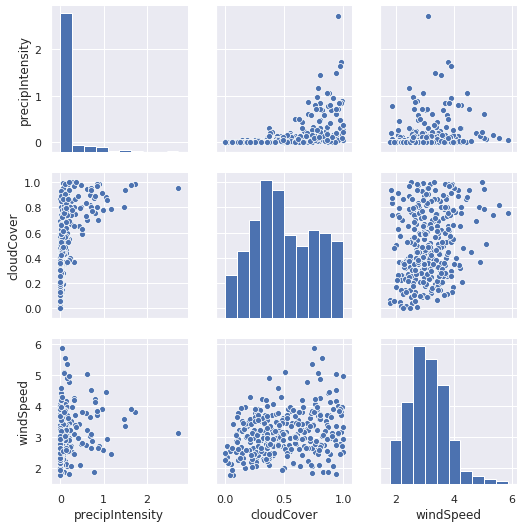

In [20]:
cols = ['precipIntensity', 'cloudCover', 'windSpeed']
sns.pairplot(df_rio[cols], size = 2.5)
plt.savefig(OUTPUT_PATH/'rio_pairplots_weather.png')

It seems that wind speed doesn't correlate at all with other relevant variables.

In fact, the correlation of both features compared to wind speed is close to 0. The plot of the correlation matrix confirms that.

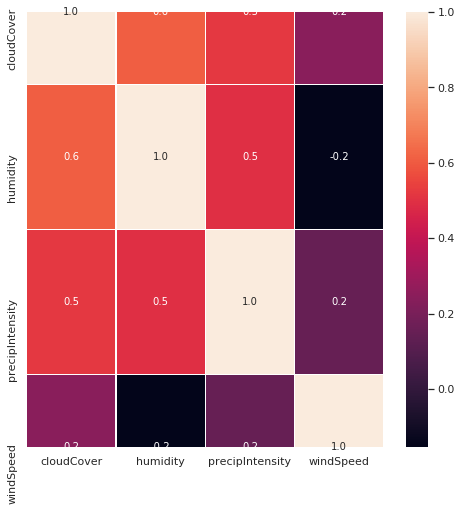

In [21]:
f,ax1 = plt.subplots(figsize=(8, 8))
sns.heatmap(df_rio.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax1);
plt.savefig(OUTPUT_PATH/'rio_corr_weather.png')

# Comparing Daily and Hour Weather Data

## Montevideo

In [22]:
df_montevideo.head(2)

,time,cloudCover,humidity,precipIntensity,windSpeed
0,2018-10-01 00:00:00,0.52,0.65,0.2475,6.79
1,2018-10-02 00:00:00,0.15,0.49,0.0011,2.29


In [23]:
df_montevideo['time'] = df_montevideo['time'].apply(dt.fromisoformat)
df_montevideo = df_montevideo.set_index('time')

In [24]:
df_montevideo_hour.head(2)

,time,cloudCover,humidity,precipIntensity,windSpeed
0,2018-10-01 00:00:00,0.19,0.84,1.7011,9.21
1,2018-10-01 01:00:00,0.19,0.85,1.4210,12.79


In [25]:
df_montevideo_hour['time'] = df_montevideo_hour['time'].apply(dt.fromisoformat)
df_montevideo_hour = df_montevideo_hour.set_index('time')

In [26]:
df_montevideo['precipAccum'] = df_montevideo.precipIntensity * 24
df_montevideo['precipAccumFromHourly'] = df_montevideo_hour.precipIntensity.resample('D').sum()

df_montevideo['diff'] = df_montevideo['precipAccum'] - df_montevideo_hour.precipIntensity.resample('D').sum()
df_montevideo['diff%'] = df_montevideo['diff'].apply(abs) / df_montevideo['precipAccum']

In [27]:
df_montevideo.head()

,cloudCover,humidity,precipIntensity,windSpeed,precipAccum,precipAccumFromHourly,diff,diff%
time,,,,,,,,
2018-10-01,0.52,0.65,0.2475,6.79,5.9400,5.9266,0.0134,0.002256
2018-10-02,0.15,0.49,0.0011,2.29,0.0264,0.0000,0.0264,1.000000
2018-10-03,0.17,0.58,0.0011,3.62,0.0264,0.0000,0.0264,1.000000
2018-10-04,0.09,0.58,0.0008,3.89,0.0192,0.0000,0.0192,1.000000
2018-10-05,0.41,0.63,0.0012,3.81,0.0288,0.0051,0.0237,0.822917


In [28]:
df_montevideo.precipAccum.describe()

count    330.000000
mean       3.165840
std        7.680697
min        0.000000
25%        0.028800
50%        0.153600
75%        1.872000
max       49.140000
Name: precipAccum, dtype: float64

Entre o primeiro quartil e a mediana, os dados de hora e de dia apresentam uma boa divergência. Sendo que a precipitação diária com base nos dados diários sempre superestima o mesmo valor quando este tem origem nos dados por hora

In [29]:
df_montevideo.loc[(df_montevideo.precipAccum > 0.028800) & (df_montevideo.precipAccum < 0.153600), 'diff%'].describe()

count    68.000000
mean      0.423173
std       0.288349
min       0.032197
25%       0.193413
50%       0.347022
75%       0.659868
max       1.000000
Name: diff%, dtype: float64

Nos dois últimos quartis, a divergência é tolerável. 

In [30]:
df_montevideo.loc[df_montevideo.precipAccum >= 0.153600, 'diff%'].describe()

count    139.000000
mean       0.021775
std        0.035458
min        0.000002
25%        0.000450
50%        0.004716
75%        0.026371
max        0.173958
Name: diff%, dtype: float64

## Rio de Janeiro

In [31]:
df_rio.head(2)

,time,cloudCover,humidity,precipIntensity,windSpeed
0,2018-10-01 00:00:00,0.916667,0.83,0.148567,2.076667
1,2018-10-02 00:00:00,0.320000,0.73,0.000900,3.066667


In [32]:
df_rio['time'] = df_rio['time'].apply(dt.fromisoformat)
df_rio = df_rio.set_index('time')

In [33]:
df_rio_hour.head(2)

,time,cloudCover,humidity,precipIntensity,windSpeed
0,2018-10-01 00:00:00,1.0,0.873333,0.191667,2.026667
1,2018-10-01 01:00:00,1.0,0.873333,0.187300,2.016667


In [34]:
df_rio_hour['time'] = df_rio_hour['time'].apply(dt.fromisoformat)
df_rio_hour = df_rio_hour.set_index('time')

In [35]:
df_rio['precipAccum'] = df_rio.precipIntensity * 24
df_rio['precipAccumFromHourly'] = df_rio_hour.precipIntensity.resample('D').sum()

df_rio['diff'] = df_rio['precipAccum'] - df_rio['precipAccumFromHourly']
df_rio['diff%'] = df_rio['diff'].apply(abs) / df_rio['precipAccum']

In [36]:
df_rio.head()

,cloudCover,humidity,precipIntensity,windSpeed,precipAccum,precipAccumFromHourly,diff,diff%
time,,,,,,,,
2018-10-01,0.916667,0.830000,0.148567,2.076667,3.5656,3.563000,0.002600,0.000729
2018-10-02,0.320000,0.730000,0.000900,3.066667,0.0216,0.000000,0.021600,1.000000
2018-10-03,0.460000,0.766667,0.007500,3.510000,0.1800,0.155333,0.024667,0.137037
2018-10-04,0.883333,0.793333,0.133733,3.733333,3.2096,3.203633,0.005967,0.001859
2018-10-05,0.943333,0.796667,0.607367,5.033333,14.5768,14.573967,0.002833,0.000194


Diferente de Montevideo, o Rio tem muitas entradas nas quais o acumulado pelos dados de hora é maior que o acumulado pelo dia.

In [37]:
df_rio.precipAccum.describe()

count    330.000000
mean       3.307142
std        7.314712
min        0.000000
25%        0.057600
50%        0.463600
75%        2.703400
max       65.326400
Name: precipAccum, dtype: float64

Entre o primeiro quartil e a mediana, os dados de hora e de dia apresentam uma boa divergência. Sendo que a precipitação diária com base nos dados diários sempre superestima o mesmo valor quando este tem origem nos dados por hora

In [38]:
df_rio.loc[(df_rio.precipAccum > 0.057600) & (df_rio.precipAccum < 0.463600), 'diff%'].describe()

count    65.000000
mean      0.178709
std       0.183330
min       0.002804
25%       0.054229
50%       0.109330
75%       0.253151
max       0.810049
Name: diff%, dtype: float64

Nos dois últimos quartis, a divergência é tolerável. 

In [39]:
df_rio.loc[df_rio.precipAccum >= 0.463600, 'diff%'].describe()

count    131.000000
mean       0.014895
std        0.075203
min        0.000002
25%        0.000465
50%        0.003805
75%        0.011990
max        0.858634
Name: diff%, dtype: float64

# Big picture of a 1 year timeframe
All cities

In [40]:
for city, loc in zip(["Miraflores", "Montevideo", "Rio de Janeiro"], ["miraflores", "montevideo", "rio_de_janeiro"]):
    print(city, loc)

Miraflores miraflores
Montevideo montevideo
Rio de Janeiro rio_de_janeiro


In [41]:
hour_of_day = 12+1

prec_dict = {}
wind_dict = {}
time_list = []
for city, loc in zip(["Miraflores", "Montevideo", "Rio de Janeiro"], ["miraflores", "montevideo", "rio_de_janeiro"]):
    file_name = str(RAW_PATH/city/f'{loc}-daily_weather.csv')
    csv_reader = csv.reader(open(file_name, mode='r'))
    
    prec_list = []
    wind_list = []
    day_count = 0
    for row in csv_reader:
        if day_count == 0: 
            day_count += 1
            continue
        prec_list.append(float(row[3]))
        wind_list.append(float(row[4]))
        
        if loc == "miraflores":
            date = day_count #int(row[0][8:10])
            date = dt.strptime(row[0][:10], "%Y-%m-%d").date()
            time_list.append(date)
        day_count += 1
            
    prec_dict[loc] = prec_list
    wind_dict[loc] = wind_list
prec_dict['datetime'] = time_list

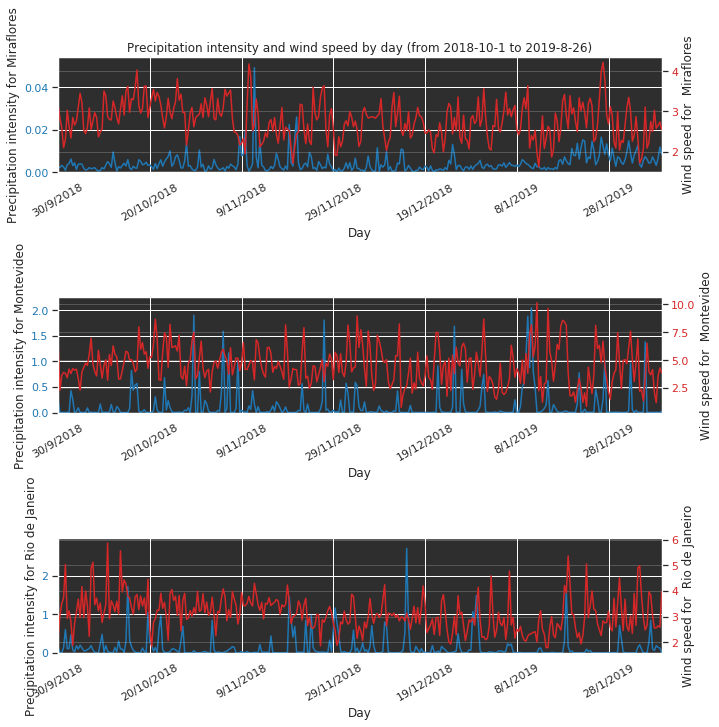

In [42]:
X = range(len(prec_dict['datetime']))
X_labels = ['{}/{}/{}'.format(i.day, i.month, i.year)  for i in prec_dict['datetime']]

legend = ['Miraflores', 'Montevideo', 'Rio_de_Janeiro']

axes2 = []
fig, (ax1a, ax1b, ax1c) = plt.subplots(3,figsize=(10,10))
axes1 = [ax1a, ax1b, ax1c]

count = 0
for city in legend:
    y = prec_dict[city.lower()] #city.lower()
    city_clean = re.sub('_', ' ', city)
    color = 'tab:blue'
    title = 'Precipitation intensity and wind speed by day (from 2018-10-1 to 2019-8-26)'
    axes1[0].set_title(title)
    axes1[count].set_xlabel('Day')
    axes1[count].set_ylabel('Precipitation intensity for {}'.format(city_clean))
    axes1[count].tick_params(axis='y', labelcolor=color)
    axes1[count].set_ylim([0, max(y)*1.1])
    axes1[count].set_xlim([0, max(X)])
    axes1[count].set_facecolor("#2E2E2E")
    axes1[count].plot(X, y, color)
    
    axes1[count].set_xticklabels([X_labels[i] for i in X if i%20==0], rotation=30)
    
    y = wind_dict[city.lower()]
    color = 'tab:red'
    ax_right = axes1[count].twinx()
    axes2.append(ax_right)
    axes2[count].set_ylabel('Wind speed for  {}'.format(city_clean))
    axes2[count].plot(X, y, color)
    axes2[count].tick_params(axis='y', labelcolor=color)
    
    plt.grid(True, color="white", alpha=0.2)
    
    fig.tight_layout()
    count += 1

plt.savefig(OUTPUT_PATH/'pltchart_rain_wind.png')

no dia em torno de 250 todos tem um mesmo dia de muita chuva. investigar.

# Interactive visualizations
https://altair-viz.github.io/user_guide/compound_charts.html

https://github.com/altair-viz/altair/issues/873

different  scales
https://github.com/altair-viz/altair/issues/1138

demos
https://altair-viz.github.io/user_guide/interactions.html

In [43]:
import altair as alt
from scripts.viz_tools import *
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [44]:
df_montevideo = pd.read_csv(RAW_PATH/'Montevideo'/'montevideo-daily_weather.csv')
df_miraflores = pd.read_csv(RAW_PATH/'Miraflores'/'miraflores-daily_weather.csv')
df_rio = pd.read_csv(RAW_PATH/'Rio de Janeiro'/'rio_de_janeiro-daily_weather.csv')

In [45]:
df_montevideo['city'] = 'Montevideo'
df_miraflores['city'] = 'Miraflores'
df_rio['city'] = 'Rio de Janeiro'

In [46]:
source = pd.concat([df_montevideo, df_miraflores, df_rio], ignore_index=True)

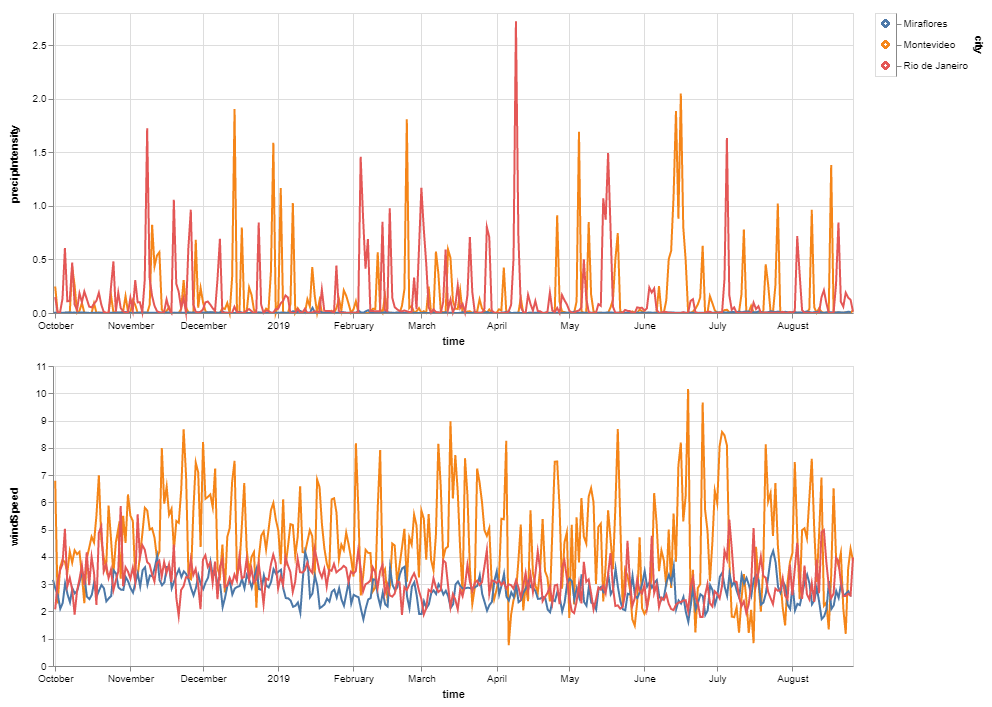

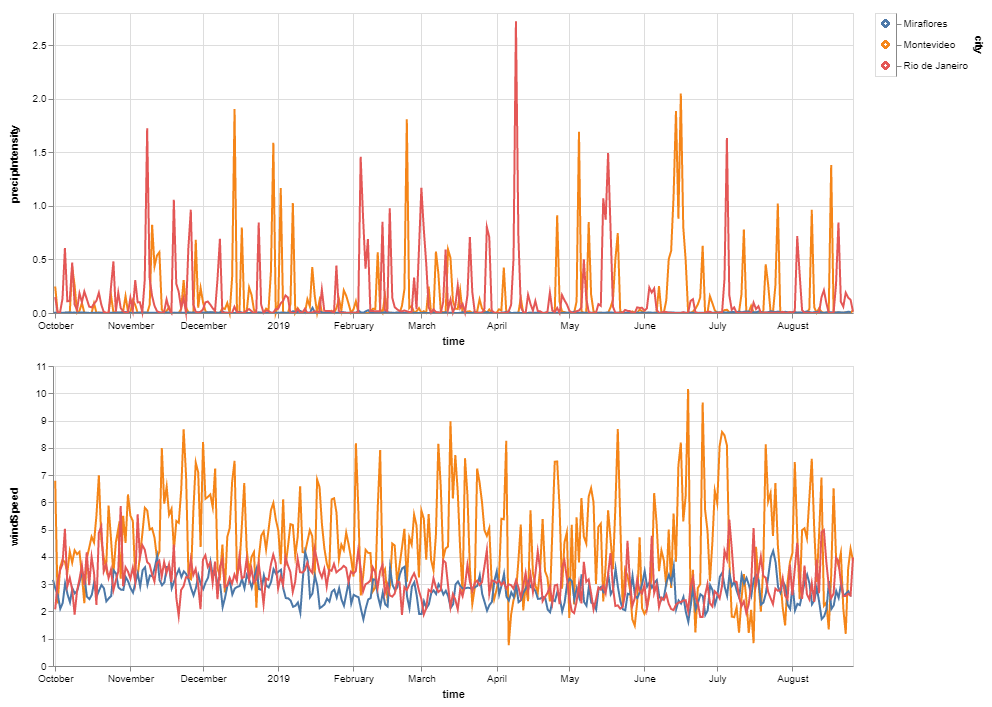

In [47]:
selection = alt.selection_multi(fields=['city'])
color = alt.condition(selection,
                      alt.Color('city:N', legend=None),
                      alt.value('lightgray'))

line1 = chart_with_rule(source, 'precipIntensity:Q', selection)

# alt.Chart(source).mark_line().encode(
#     x='time:T', y='precipIntensity:Q', color=color).properties(width=800, height=300).transform_filter(selection)

line2 = chart_with_rule(source, 'windSpeed:Q', selection)

# alt.Chart(source).mark_line().encode(
#     x='time:T', y='windSpeed:Q', color=color).properties(width=800, height=300).transform_filter(selection)

legend = alt.Chart(source).mark_point().encode(
    y=alt.Y('city:N', axis=alt.Axis(orient='right')),
    color=color
).add_selection(
    selection
)

line1 & line2 | legend

In [48]:
(line1 & line2 | legend).save(str(OUTPUT_PATH/'2chart_rain_wind.html'))

In [49]:
alt.vconcat(wind_rain_interactive_chart(df_montevideo, title='Montevideo'),
            wind_rain_interactive_chart(df_miraflores, title='Miraflores'),
            wind_rain_interactive_chart(df_rio, title='Rio de Janeiro')).configure_axis(grid=False).save(
    str(OUTPUT_PATH/'3chart_city_rain&wind.html'))

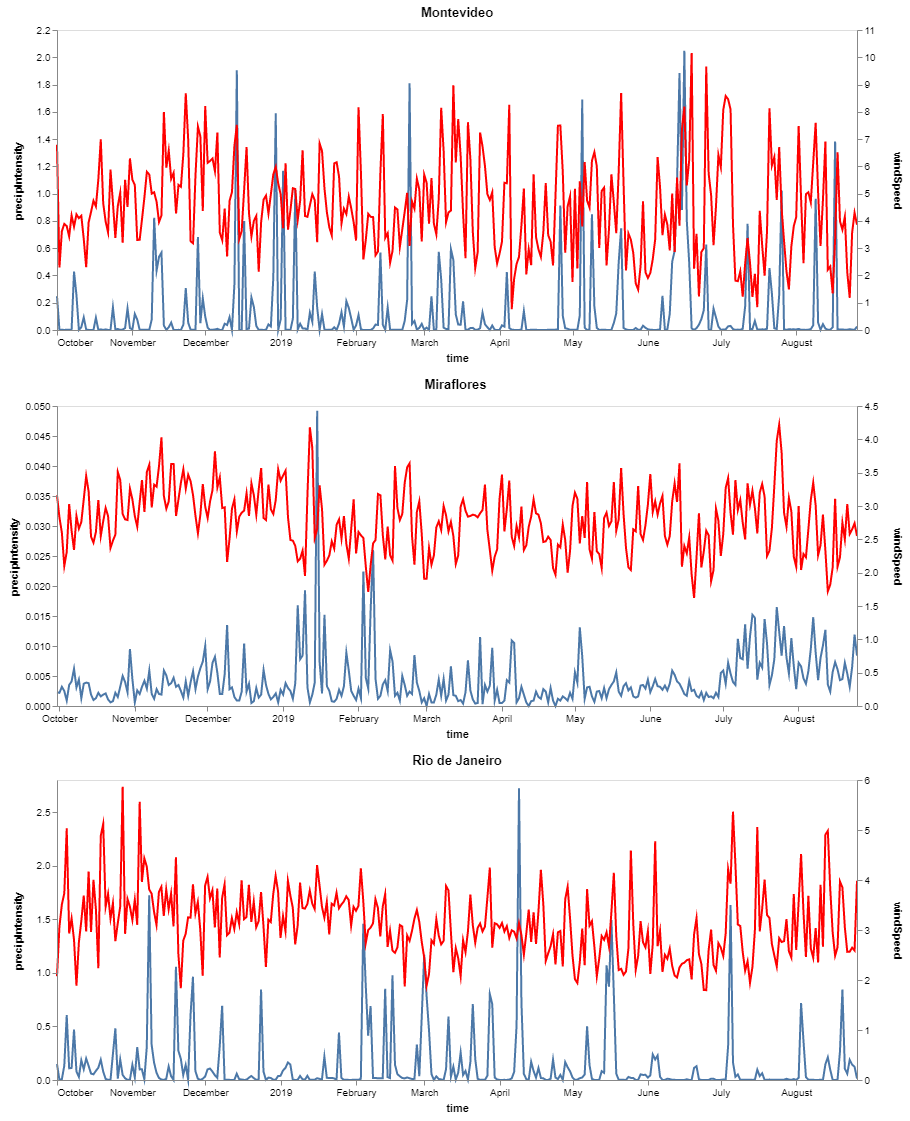

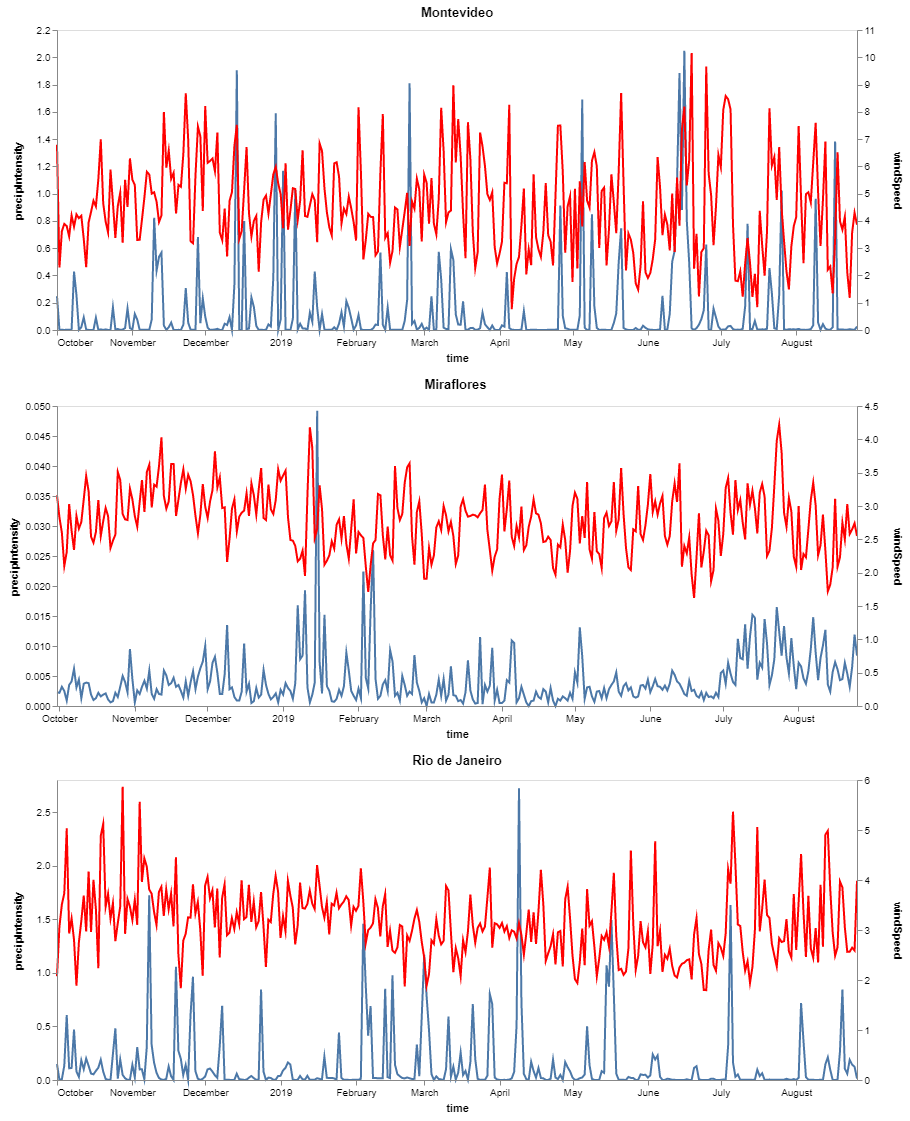

In [50]:
alt.vconcat(wind_rain_interactive_chart(df_montevideo, title='Montevideo'),
            wind_rain_interactive_chart(df_miraflores, title='Miraflores'),
            wind_rain_interactive_chart(df_rio, title='Rio de Janeiro')).configure_axis(grid=False)

### worst day

In [51]:
def get_quantile_or_worst(city, quantile=True, QUANTILE=0.8):
    if city == 'Rio de Janeiro':
        file_name = str(RAW_PATH/city/'rio_de_janeiro-daily_weather.csv')
    else:
        file_name = str(RAW_PATH/city/f'{city.lower()}-daily_weather.csv')
    
    csv_reader = csv.reader(open(file_name, mode='r'))
    
    prec_list = []
    count = -1
    for row in csv_reader:
        count +=1
        if count == 0: continue
        prec_list.append(float(row[3]))
    temp_sorted = prec_list[:]
    temp_sorted.sort()
    print(max(prec_list))
    if quantile == True:
        print(prec_dict['datetime'][prec_list.index(temp_sorted[int(QUANTILE*len(temp_sorted))])+1])
    if quantile == False: #get worst day
        print(prec_dict['datetime'][prec_list.index(max(prec_list))+1])

In [52]:
get_quantile_or_worst("Rio de Janeiro", quantile=False)

2.7219333333333338
2019-04-09


In [53]:
get_quantile_or_worst("Montevideo", quantile=False)

2.0475
2019-06-16


In [54]:
get_quantile_or_worst("Miraflores", quantile=False)

0.0492
2019-01-16


In [55]:
prec_list.index(max(prec_list))

190